In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score

# Heart Disease Prediction

In [3]:
# loading the data from csv file to a Panda Dataframe
path = '/Users/kaylakim/Documents/TheUnicornTwins/TUT.Projects/MedicalPros/HeartDisease/'
heart_data = pd.read_csv(path + 'heart_disease_data.csv')

# printing the first 5 rows of the dataframe
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Separating the features & Target

In [4]:
X = heart_data.drop(columns='target', axis=1)
y = heart_data.target

## Model Training
#### Splitting the data to training data & valid data

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, 
                                                       stratify=y, random_state=2)

### 1. Create model


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score

In [11]:
models = [LogisticRegression(solver='liblinear'),
          GaussianNB(), BernoulliNB(), MultinomialNB(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(criterion='entropy'),
          RandomForestClassifier(n_estimators=200),
          SVC(kernel='linear')]

In [12]:
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
i = 0
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
    print(accuracies)
    entries.append([model_name, accuracies.mean()])
    i += 1
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

[0.81967213 0.86885246 0.85245902 0.85       0.71666667]
[0.80327869 0.8852459  0.78688525 0.83333333 0.71666667]
[0.7704918  0.83606557 0.80327869 0.83333333 0.76666667]
[0.75409836 0.73770492 0.7704918  0.78333333 0.7       ]
[0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
[0.75409836 0.85245902 0.68852459 0.73333333 0.71666667]
[0.85245902 0.8852459  0.75409836 0.8        0.78333333]
[0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]


In [13]:
cv_df

,model_name,accuracy
0,LogisticRegression,0.821530
1,GaussianNB,0.805082
2,BernoulliNB,0.801967
3,MultinomialNB,0.749126
4,KNeighborsClassifier,0.643880
5,DecisionTreeClassifier,0.749016
6,RandomForestClassifier,0.815027
7,SVC,0.828306


Text(0.5, 1.0, 'Accuracies of Algorithms')

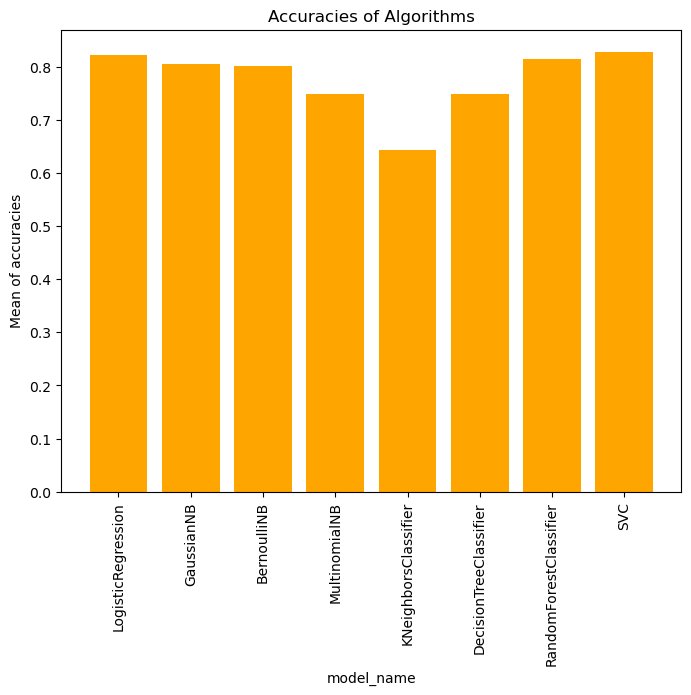

In [14]:
plt.figure(figsize=(8, 6))
plt.bar(cv_df['model_name'], cv_df['accuracy'], color='orange')
plt.xlabel('model_name')
plt.ylabel('Mean of accuracies')
plt.xticks(rotation='vertical')
plt.title('Accuracies of Algorithms')

#### Naive Bayes

In [15]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

### 2. Validate model

In [16]:
print(mean_absolute_error(y_valid, y_pred))

0.18032786885245902


### 3. Evaluate model
#### Accuracy Score

In [17]:
print(f'Accuracy score of valid data= {accuracy_score(y_valid, y_pred)}')
y_train_pred = model.predict(X_train)
print(f'Accuracy score of training data= {accuracy_score(y_train, y_train_pred)}')

Accuracy score of valid data= 0.819672131147541
Accuracy score of training data= 0.8471074380165289


In [18]:
print(f'The valid score of valid data= {model.score(X_valid, y_valid)*100}%')
print(f'The train score of training data= {model.score(X_train, y_train)*100}%')

The valid score of valid data= 81.9672131147541%
The train score of training data= 84.71074380165288%


#### Performance Metric

In [19]:
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[25  3]
 [ 8 25]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        28
           1       0.89      0.76      0.82        33

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



#### Precision and Recall

In [20]:
print(f'Precision= {precision_score(y_valid, y_pred)}')
print(f'Recall= {recall_score(y_valid, y_pred)}')

Precision= 0.8928571428571429
Recall= 0.7575757575757576


In [21]:
input_data = (57,1,0,140,192,0,1,148,0,0.4,1,0,1)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("The Person does not have a Heart Disease.")
else:
    print("The Person has Heart Disease.")  


[1]
The Person has Heart Disease.
